# Explore here

In [1]:
# Importamos las librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
from sklearn.impute import KNNImputer
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import *

# EDA

In [2]:
# Cargamos los datos con información de las columnas
Describe_Columna = pd.read_csv(r'..\data\raw\data_dict.csv', encoding='latin-1')
pd.set_option('display.max_rows', None)

 # Visualizamos los datos
Describe_Columna

Feature  \
0                                                 fips   
1                                              TOT_POP   
2                                                  0-9   
3                               0-9 y/o % of total pop   
4                                               10-19'   
5                             10-19 y/o % of total pop   
6                                                20-29   
7                             20-29 y/o % of total pop   
8                                                30-39   
9                             30-39 y/o % of total pop   
10                                               40-49   
11                            40-49 y/o % of total pop   
12                                               50-59   
13                            50-59 y/o % of total pop   
14                                               60-69   
15                            60-69 y/o % of total pop   
16                                               70-79   
17                            70-79 y/o % of total pop   
18                                                 80+   
19                              80+ y/o % of total pop   
20                                     White-alone pop   
21                                       % White-alone   
22                                     Black-alone pop   
23                                       % Black-alone   
24           Native American/American Indian-alone pop   
25                                       % NA/AI-alone   
26                                     Asian-alone pop   
27                                       % Asian-alone   
28                 Hawaiian/Pacific Islander-alone pop   
29                                 % Hawaiian/PI-alone   
30                               Two or more races pop   
31                                 % Two or more races   
32                                      N_POP_CHG_2018   
33                                   GQ_ESTIMATES_2018   
34                                        R_birth_2018   
35                                        R_death_2018   
36                                  R_NATURAL_INC_2018   
37                            R_INTERNATIONAL_MIG_2018   
38                                 R_DOMESTIC_MIG_2018   
39                                      R_NET_MIG_2018   
40             Less than a high school diploma 2014-18   
41                    High school diploma only 2014-18   
42          Some college or associate's degree 2014-18   
43                 Bachelor's degree or higher 2014-18   
44   Percent of adults with less than a high school...   
45   Percent of adults with a high school diploma o...   
46   Percent of adults completing some college or a...   
47   Percent of adults with a bachelor's degree or ...   
48                                         POVALL_2018   
49                                      PCTPOVALL_2018   
50                                      PCTPOV017_2018   
51                                      PCTPOV517_2018   
52                                       MEDHHINC_2018   
53                                      CI90LBINC_2018   
54                                      CI90UBINC_2018   
55                           Civilian_labor_force_2018   
56                                       Employed_2018   
57                                     Unemployed_2018   
58                              Unemployment_rate_2018   
59           Med_HH_Income_Percent_of_State_Total_2018   
60   Active Physicians per 100000 Population 2018 (...   
61   Total Active Patient Care Physicians per 10000...   
62   Active Patient Care Primary Care Physicians pe...   
63   Active General Surgeons per 100000 Population ...   
64   Active Patient Care General Surgeons per 10000...   
65                    Total nurse practitioners (2019)   
66                   Total physician assistants (2019)   
67                              Total Hospitals (2019)   
68               Internal Medicine Primary Ca

In [3]:
# Cargamos los datos a analizar
df = pd.read_csv(r'..\data\raw\demographic_health_data.csv')

# Visualizamos los datos
df.head()

fips  TOT_POP    0-9  0-9 y/o % of total pop  19-Oct  \
0  1001    55601   6787               12.206615    7637   
1  1003   218022  24757               11.355276   26913   
2  1005    24881   2732               10.980266    2960   
3  1007    22400   2456               10.964286    2596   
4  1009    57840   7095               12.266598    7570   

   10-19 y/o % of total pop  20-29  20-29 y/o % of total pop  30-39  \
0                 13.735364   6878                 12.370281   7089   
1                 12.344167  23579                 10.814964  25213   
2                 11.896628   3268                 13.134520   3201   
3                 11.589286   3029                 13.522321   3113   
4                 13.087828   6742                 11.656293   6884   

   30-39 y/o % of total pop  ...  COPD_number  diabetes_prevalence  \
0                 12.749771  ...         3644                 12.9   
1                 11.564429  ...        14692                 12.0   
2                 12.865239  ...         2373                 19.7   
3                 13.897321  ...         1789                 14.1   
4                 11.901798  ...         4661                 13.5   

   diabetes_Lower 95% CI  diabetes_Upper 95% CI  diabetes_number  \
0                   11.9                   13.8             5462   
1                   11.0                   13.1            20520   
2                   18.6                   20.6             3870   
3                   13.2                   14.9             2511   
4                   12.6                   14.5             6017   

   CKD_prevalence  CKD_Lower 95% CI  CKD_Upper 95% CI  CKD_number  \
0             3.1               2.9               3.3        1326   
1             3.2               3.0               3.5        5479   
2             4.5               4.2               4.8         887   
3             3.3               3.1               3.6         595   
4             3.4               3.2               3.7        1507   

   Urban_rural_code  
0                 3  
1                 4  
2                 6  
3                 2  
4                 2  

[5 rows x 108 columns]

In [4]:
# Visualizamos las Estadísticas descriptivas
df.describe()

fips       TOT_POP           0-9  0-9 y/o % of total pop  \
count   3140.000000  3.140000e+03  3.140000e+03             3140.000000   
mean   30401.640764  1.041894e+05  1.274030e+04               11.871051   
std    15150.559265  3.335834e+05  4.180730e+04                2.124081   
min     1001.000000  8.800000e+01  0.000000e+00                0.000000   
25%    18180.500000  1.096325e+04  1.280500e+03               10.594639   
50%    29178.000000  2.580050e+04  3.057000e+03               11.802727   
75%    45081.500000  6.791300e+04  8.097000e+03               12.951840   
max    56045.000000  1.010552e+07  1.208253e+06               25.460677   

             19-Oct  10-19 y/o % of total pop         20-29  \
count  3.140000e+03               3140.000000  3.140000e+03   
mean   1.336798e+04                 12.694609  1.446933e+04   
std    4.228439e+04                  1.815044  4.957773e+04   
min    0.000000e+00                  0.000000  0.000000e+00   
25%    1.374500e+03                 11.674504  1.263750e+03   
50%    3.274000e+03                 12.687422  3.108000e+03   
75%    8.822250e+03                 13.659282  8.976250e+03   
max    1.239139e+06                 23.304372  1.557073e+06   

       20-29 y/o % of total pop         30-39  30-39 y/o % of total pop  ...  \
count               3140.000000  3.140000e+03               3140.000000  ...   
mean                  12.283979  1.391649e+04                 11.751535  ...   
std                    3.126297  4.899095e+04                  1.696599  ...   
min                    0.000000  1.100000e+01                  6.092789  ...   
25%                   10.496774  1.232750e+03                 10.689322  ...   
50%                   11.772649  3.000500e+03                 11.580861  ...   
75%                   13.182260  8.314250e+03                 12.639379  ...   
max                   37.570198  1.501844e+06                 22.225129  ...   

         COPD_number  diabetes_prevalence  diabetes_Lower 95% CI  \
count    3140.000000          3140.000000            3140.000000   
mean     5827.242357            13.073503              12.088089   
std     15720.551934             2.724351               2.622948   
min         7.000000             6.100000               5.500000   
25%       815.000000            11.200000              10.300000   
50%      1963.500000            12.800000              11.800000   
75%      4727.000000            14.800000              13.700000   
max    434075.000000            25.600000              24.200000   

       diabetes_Upper 95% CI  diabetes_number  CKD_prevalence  \
count            3140.000000      3140.000000     3140.000000   
mean               14.053726      9326.577707        3.446242   
std                 2.824828     29754.601185        0.568059   
min                 6.700000        11.000000        1.800000   
25%                12.100000      1187.750000        3.100000   
50%                13.800000      2743.000000        3.400000   
75%                15.900000      6679.250000        3.800000   
max                27.000000    952335.000000        6.200000   

       CKD_Lower 95% CI  CKD_Upper 95% CI     CKD_number  Urban_rural_code  
count       3140.000000       3140.000000    3140.000000       3140.000000  
mean           3.207516          3.710478    2466.234076          4.635350  
std            0.527740          0.613069    7730.422067          1.510447  
min            1.700000          1.900000       3.000000          1.000000  
25%            2.900000          3.300000     314.750000          3.000000  
50%            3.200000          3.700000     718.000000          5.000000  
75%            3.500000          4.100000    1776.250000          6.000000  
max            5.800000          6.600000  237766.000000          6.000000  

[8 rows x 106 columns]

In [5]:
# Visualizamos la informacion de la datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [6]:
# Verificamos si existen datos únicos
n_unicos = df.nunique().sort_values(ascending=False)
n_unicos

fips                                                                             3140
80+ y/o % of total pop                                                           3139
70-79 y/o % of total pop                                                         3139
60-69 y/o % of total pop                                                         3139
% White-alone                                                                    3139
10-19 y/o % of total pop                                                         3137
% Two or more races                                                              3137
% NA/AI-alone                                                                    3137
20-29 y/o % of total pop                                                         3137
0-9 y/o % of total pop                                                           3136
40-49 y/o % of total pop                                                         3136
Family Medicine/General Practice Primary Care (2019)  

In [7]:
# Revisamos que no tengamos datos duplicados
df.duplicated().sum()

np.int64(0)

In [8]:
# Verificamos los datos nulos o faltantes
(df.isnull().sum() > 0).sum() # Se realiza suma de faltantes por columna, se verifica si es mayor a 0 y se suman

np.int64(0)

<Axes: >

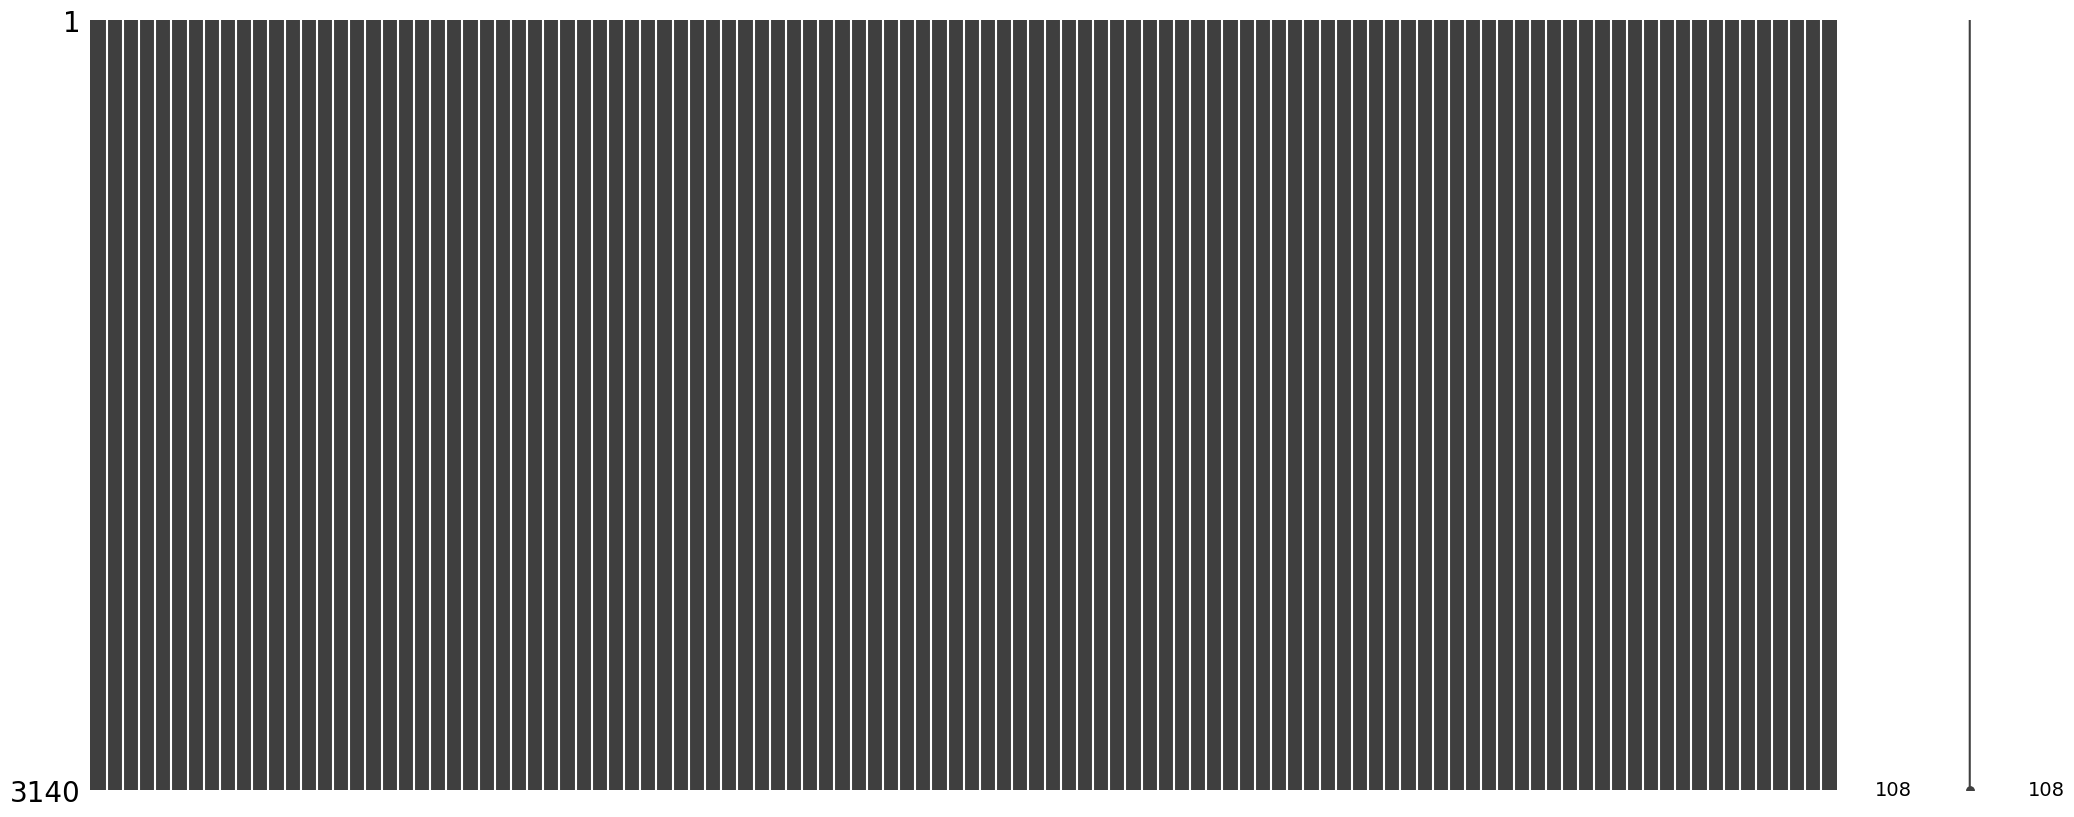

In [9]:
msno.matrix(df)

No hay datos faltantes en el datasets

Se eliminan columnas redundantes de información para minimizar datasets y datos a procesar

In [10]:
Columnas_Drop = ['fips',
    '0-9 y/o % of total pop',
    '10-19 y/o % of total pop',
    '20-29 y/o % of total pop',
    '30-39 y/o % of total pop',
    '40-49 y/o % of total pop',
    '50-59 y/o % of total pop',
    '60-69 y/o % of total pop',
    '70-79 y/o % of total pop',
    '80+ y/o % of total pop',
    '% White-alone',
    '% Black-alone',
    '% NA/AI-alone',
    '% Asian-alone',
    '% Hawaiian/PI-alone',
    '% Two or more races',
    'POP_ESTIMATE_2018',
    'PCTPOVALL_2018',
    'Percent of adults with less than a high school diploma 2014-18',
    'Percent of adults with a high school diploma only 2014-18',
    'Percent of adults completing some college or associate\'s degree 2014-18',
    'Percent of adults with a bachelor\'s degree or higher 2014-18',
    'CI90LBINC_2018',
    'CI90UBINC_2018',
    'Civilian_labor_force_2018',
    'Population Aged 60+',
    'Percent of Population Aged 60+',
    'STATE_FIPS',
    'COUNTY_NAME',
    'STATE_NAME',
    'CNTY_FIPS',
    'anycondition_prevalence',
    'anycondition_Lower 95% CI',
    'anycondition_Upper 95% CI',
    'Obesity_prevalence',
    'Obesity_Lower 95% CI',
    'Obesity_Upper 95% CI',
    'Heart disease_prevalence',
    'Heart disease_Lower 95% CI',
    'Heart disease_Upper 95% CI',
    'COPD_prevalence',
    'COPD_Lower 95% CI',
    'COPD_Upper 95% CI',
    'diabetes_prevalence',
    'diabetes_Lower 95% CI',
    'diabetes_Upper 95% CI',
    'CKD_prevalence',
    'CKD_Lower 95% CI',
    'CKD_Upper 95% CI']

# Cantidades de columnas a eliminar
len(Columnas_Drop)

49

In [11]:
# Eliminamos las columnas que no aportan información
df = df.drop(columns=Columnas_Drop, errors='ignore')

In [12]:
# Veriificamos la eliminación de las columnas
df.shape

(3140, 59)

Combinamos variables relacionadas entre sí.
Edades, Razas/Etnias, Profesionales Médicos y Condiciones de Salud

# Visualizaciones

In [13]:
# Escalamiento de los datos para combinar datos de diferentes escalas y gráficar
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

In [14]:
# Combinaciones de Edad
df['Age_0_19'] = df['0-9'] + df['19-Oct']
df['Age_20_39'] = df['20-29'] + df['30-39']
df['Age_40_59'] = df['40-49'] + df['50-59']
df['Age_60+'] = df['60-69'] + df['70-79'] + df['80+']

# Combinaciones de Raza/Etnicidad
df['Other_races'] = (df['Native American/American Indian-alone pop'] + 
    df['Asian-alone pop'] + 
    df['Hawaiian/Pacific Islander-alone pop'] + 
    df['Two or more races pop'])

# Calcular el índice de disponibilidad de profesionales de la salud
df['Indice_Profesionales_Disponibles'] = (
    df['Active Physicians per 100000 Population 2018 (AAMC)'] +
    df['Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)'] +
    df['Active Primary Care Physicians per 100000 Population 2018 (AAMC)'] +
    df['Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)'] +
    df['Active General Surgeons per 100000 Population 2018 (AAMC)'] +
    df['Active Patient Care General Surgeons per 100000 Population 2018 (AAMC)']
) / 6

# Calcular el índice de Capacidad del Sistema de Atención Médica
df['Indice_Capacidad_Medica'] = (
    df['Total nurse practitioners (2019)'] +
    df['Total physician assistants (2019)'] +
    df['Total Hospitals (2019)'] +
    df['Internal Medicine Primary Care (2019)'] +
    df['Family Medicine/General Practice Primary Care (2019)'] +
    df['Total Specialist Physicians (2019)'] +
    df['ICU Beds_x']
)

# Creación de una nueva variable que sume todas las condiciones de salud
df['Condiciones_de_Salud'] = (
    df['anycondition_number'] +
    df['Obesity_number'] +
    df['Heart disease_number'] +
    df['COPD_number'] +
    df['diabetes_number'] +
    df['CKD_number'])

# Eliminar columnas combinadas
df = df.drop(columns=[
    '0-9', '19-Oct', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+', 
    'Native American/American Indian-alone pop', 'Asian-alone pop', 'Hawaiian/Pacific Islander-alone pop', 
    'Two or more races pop', 'Total Population', 'Active Physicians per 100000 Population 2018 (AAMC)',
    'Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)',
    'Active Primary Care Physicians per 100000 Population 2018 (AAMC)',
    'Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)',
    'Active General Surgeons per 100000 Population 2018 (AAMC)',
    'Active Patient Care General Surgeons per 100000 Population 2018 (AAMC)', 
    'anycondition_number', 'Obesity_number', 'Heart disease_number', 'COPD_number', 'diabetes_number', 'CKD_number'],
    errors='ignore')

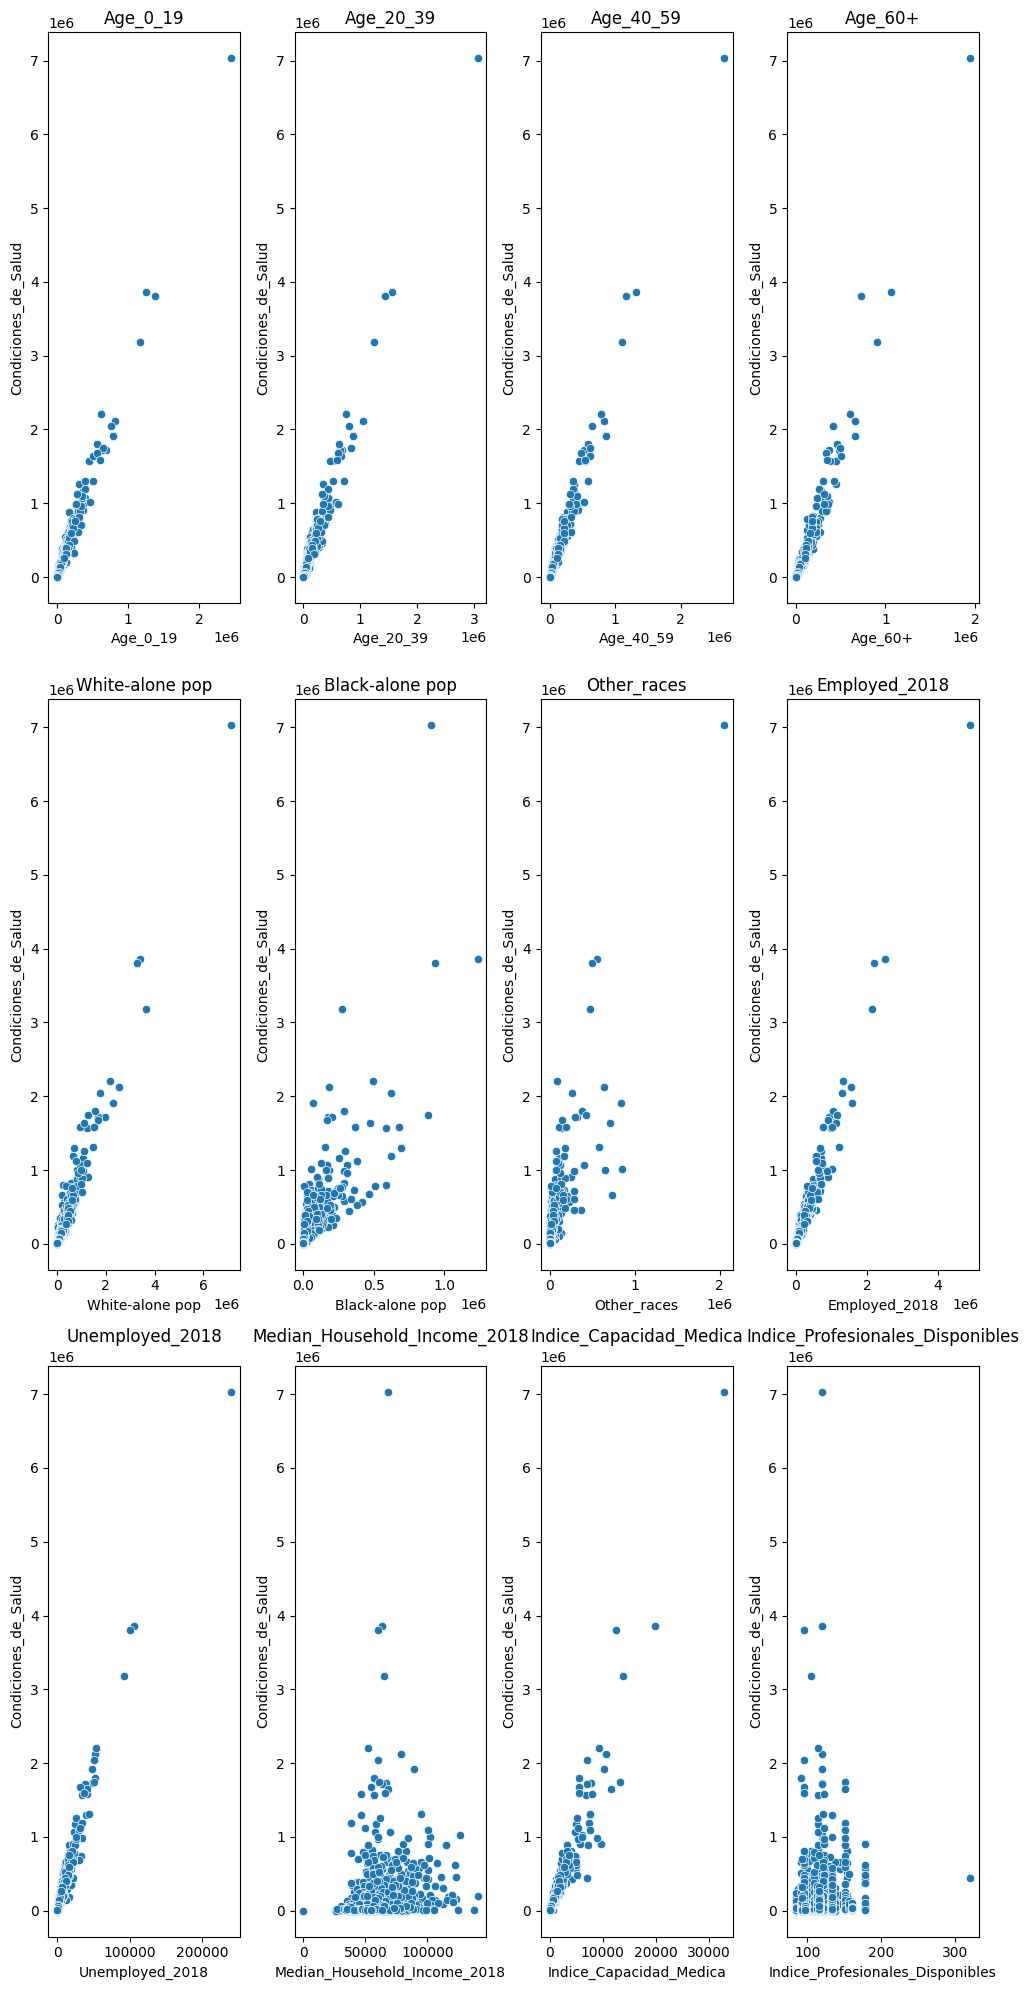

In [15]:
# Seleccionamos las columnas a graficar
columnas_graficar = df[['Age_0_19',
    'Age_20_39',
    'Age_40_59',
    'Age_60+',
    'White-alone pop',
    'Black-alone pop',
    'Other_races',
    'Employed_2018',
    'Unemployed_2018',
    'Median_Household_Income_2018',
    'Indice_Capacidad_Medica',
    'Indice_Profesionales_Disponibles']].columns

# Creamos histplot para cada una
fig, axes = plt.subplots(3, 4, figsize=(10, 20))
axes = axes.flatten()  # Convertimos los ejes en una lista plana para iterar

# Iteramos por cada columna del dataframe
for i, columna in enumerate(columnas_graficar):
    sns.scatterplot(
        ax=axes[i],
        x=columna,
        y='Condiciones_de_Salud',
        data=df)
        #bins=20,
        #hue='Urban_rural_code')#,
        #multiple='dodge',  # separamos las barras para no superponer
        #shrink=0.7,  # ancho de barras
        #alpha=0.6  # Ajustamos transparencia
    #)
    axes[i].set_title(columna)

# Para mostrar el gráfico
plt.tight_layout()
plt.show()

# Datos de Entrenamiento y Prueba

In [16]:
# Separamos las variables independientes de la dependiente
X = df.drop(['Condiciones_de_Salud'], axis=1)
y = df['Condiciones_de_Salud']

# Ajusta un modelo de regresión lineal
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Instancia de la influencia y obtención de la distancia de cook para cada observación
cooks_distance = model.get_influence().cooks_distance

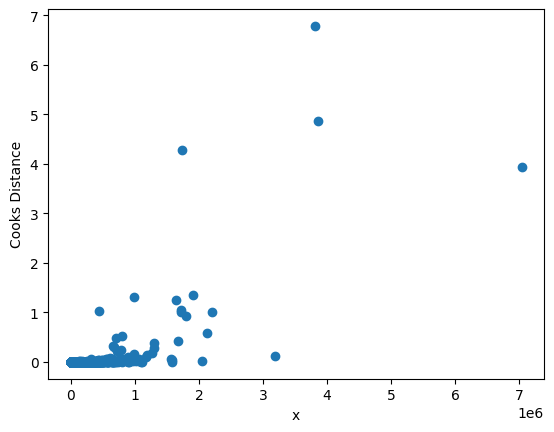

In [17]:
plt.scatter(df.Condiciones_de_Salud, cooks_distance[0])
plt.xlabel('x')
plt.ylabel('Cooks Distance')
plt.show()

In [18]:
# Punto de corte para la distancia de cook
pto_corte = 4/len(df)

# Viviendas por encima del pto de corte
len(np.where(cooks_distance[0]>pto_corte)[0])

178

In [19]:
# Eliminar observaciones que se consideran influentes
df.drop(np.where(cooks_distance[0]>pto_corte)[0])

TOT_POP  White-alone pop  Black-alone pop  N_POP_CHG_2018  \
0       55601            42660            10915             158   
1      218022           190301            19492            5403   
2       24881            12209            12042            -277   
3       22400            17211             4770            -155   
4       57840            55456              950              13   
5       10138             2661             7168             -38   
6       19680            10283             8839            -218   
7      114277            86026            24153            -387   
8       33615            19182            13446            -143   
9       26032            24217             1109             217   
10      44153            38459             4579              36   
11      12841             7343             5355             -94   
12      23920            12781            10674            -177   
13      13275            11046             1868             -92   
14      14987            14234              441              81   
15      51909            39368             9192             132   
16      54762            44138             8875             253   
17      12277             6339             5680            -158   
18      10715             7167             3309             -42   
19      36986            31269             4664             -92   
20      13824            10062             3244             -37   
21      83442            79985             1116             606   
22      48956            36119            10262            -298   
23      38310            10630            26994            -925   
24      71385            66184             1325             -19   
25      81887            61800            17570             471   
26      36748            22792            11639            -251   
27     102501            82796            16094            -436   
28      16433            14076             1970             -41   
29      31363            28738             1427            -227   
30      26314            22951             2491             -96   
31       8233             1519             6597             -85   
32      14726             5988             8561             -83   
33      17209            12280             4523              69   
34     104722            72324            28491             349   
35      51736            47215             1855            -171   
37      13844            12084             1466             -58   
38      92387            80358             9298            -204   
39      32957            25772             3606            -120   
40     163941           115690            37852            2300   
41      96174            78056            13320            2098   
42       9974             2585             7236            -130   
43      18439             3128            14886            -372   
45      19066             8939             9795            -300   
46      29763            27986             1154              -8   
47      96109            89384             2906             500   
48     413757           244947           149329            -758   
49      21067            11612             8686            -235   
50     225763            81145           133229           -1316   
51     119089            98591            15539             278   
52       9140             2791             6205            -179   
53      19938            11530             8019            -244   
54      33338            19163            12562             -97   
55      22725            17689             4428              42   
56      57781            28865            26397             753   
57      88690            77839             8384             714   
58     215707           178681            28171            1978   
59      12691             3205             9111             -89   
60      79828            51346            26208      

# Particion de Datos

In [20]:
# Dividimos los datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Los datos ya han sido escalados por lo que no se requiere de este paso nuevamente

# Regresión Lineal

In [21]:
# Creamos el modelo de regresión lineal
m_lineal = LinearRegression()
m_lineal.fit(X_train, y_train)

LinearRegression()

In [22]:
# Realizamos predicciones sobre el conjunto de entrenamiento y de testeo
y_train1 = m_lineal.predict(X_train)
y_test1 = m_lineal.predict(X_test)

# Calculamos el coeficiente
m_lineal.coef_

array([-3.09452762e-09,  1.74163455e+00,  6.10025415e-01,  7.35354197e-01,
       -3.29437524e-01,  1.23008321e+00, -9.84516455e+02,  1.04081864e+03,
        8.57467411e+02,  6.37086523e+02,  2.28868953e+02, -2.00258914e+02,
       -4.93326756e-01,  6.37966429e-01, -2.27565253e-01, -6.23201956e-01,
        8.98531892e-01,  1.68047569e+01, -8.31025261e+00, -8.21854347e-02,
        4.18943889e-01,  7.34763796e-01,  1.93209125e+02, -8.21854416e-02,
        8.64580762e+01, -4.18871363e+02, -3.33134123e+02,  2.32650853e+03,
       -4.15545446e+02, -4.25620558e+02, -2.05612752e+02, -2.59182406e+02,
       -2.72972415e+00, -2.27726397e+02, -1.72474422e+00,  5.07231125e-01,
        1.36447578e+00,  1.59467189e+00,  3.96254919e-01,  3.38011883e+01,
        2.68541880e+02])

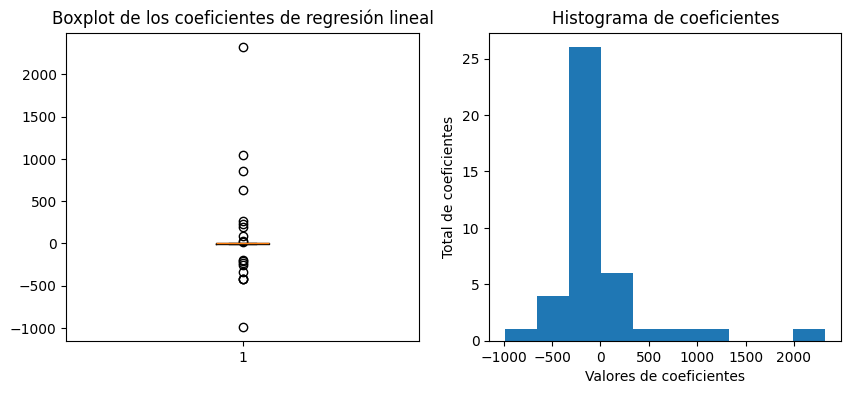

In [23]:
# Gráfico de Coeficiente del modelo lineal
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.boxplot(m_lineal.coef_)
plt.title('Boxplot de los coeficientes de regresión lineal')
plt.subplot(1, 2, 2)
plt.hist(m_lineal.coef_,10)
plt.xlabel('Valores de coeficientes')
plt.ylabel('Total de coeficientes')
plt.title('Histograma de coeficientes')
plt.show()

# Regresión Lineal con Lasso

In [24]:
# Entrenar modelo
lasso = LassoCV(alphas=np.logspace(-6, 6, 10), cv=5, random_state=42, n_jobs=-1)
lasso.fit(X_train, y_train)

C:\Users\victo\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 144362680602.51627, tolerance: 14834981497.25482
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\victo\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 129184249370.44519, tolerance: 15430724833.890598
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\victo\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 127093360402.80779, tolerance: 14834981497.25482
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\victo\AppData\Roaming\Py

LassoCV(alphas=array([1.00000000e-06, 2.15443469e-05, 4.64158883e-04, 1.00000000e-02,
       2.15443469e-01, 4.64158883e+00, 1.00000000e+02, 2.15443469e+03,
       4.64158883e+04, 1.00000000e+06]),
        cv=5, n_jobs=-1, random_state=42)

In [25]:
# Predecir en el conjunto de prueba
y_train_lasso = lasso.predict(X_train)
y_pred_lasso = lasso.predict(X_test)

# Calculo de coeficiente
lasso.coef_

array([ 0.00000000e+00,  6.69954659e-01, -2.39175742e-02,  1.09107963e-01,
       -1.54954456e-01,  3.55154043e-01, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.83150563e+00,
       -3.87801627e-01,  1.05385137e+00, -1.73087124e-01, -3.39523530e-01,
        7.53681328e-01,  0.00000000e+00,  0.00000000e+00,  2.03282093e-01,
        7.84979521e-02,  3.60131429e-01,  0.00000000e+00, -3.32571662e-01,
        6.28241338e+01, -1.26291914e+02, -5.41553769e+01,  1.10239406e+03,
       -1.93825453e+02, -1.20926345e+02,  9.44350731e+01,  3.64452100e+01,
       -1.18454120e-01, -0.00000000e+00, -9.37904341e-02, -2.26585286e-01,
        4.52298438e-01,  5.74894681e-01, -2.54109139e-01,  3.46293508e+01,
       -1.43375492e+01])

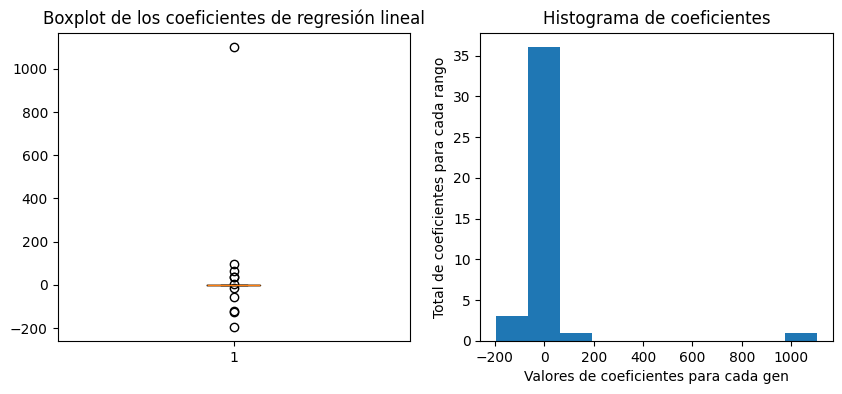

In [26]:
# Gráfico de Coeficiente del modelo Lasso
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.boxplot(lasso.coef_)
plt.title('Boxplot de los coeficientes de regresión lineal')
plt.subplot(1, 2, 2)
plt.hist(lasso.coef_,10)
plt.xlabel('Valores de coeficientes para cada gen')
plt.ylabel('Total de coeficientes para cada rango')
plt.title('Histograma de coeficientes')
plt.show()

In [27]:
print(f'El porcentaje de variables canceladas es: {round(len(lasso.coef_[np.abs(lasso.coef_)==0])/len(lasso.coef_)*100,2)}%')
print(f'El modelo utiliza {len(lasso.coef_[np.abs(lasso.coef_)>0])} variables.')

El porcentaje de variables canceladas es: 24.39%
El modelo utiliza 31 variables.


# Regresión Lineal con Ridge

In [28]:
# Entrenar modelo
m_ridge = RidgeCV(alphas=np.logspace(-6, 6, 10), cv=5)
m_ridge.fit(X_train, y_train)

C:\Users\victo\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.17614e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\victo\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.70874e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\victo\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.44811e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\victo\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.86422e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


RidgeCV(alphas=array([1.00000000e-06, 2.15443469e-05, 4.64158883e-04, 1.00000000e-02,
       2.15443469e-01, 4.64158883e+00, 1.00000000e+02, 2.15443469e+03,
       4.64158883e+04, 1.00000000e+06]),
        cv=5)

In [29]:
# Realizamos predicciones sobre el conjunto de entrenamiento y de testeo
y_train_ridge = m_ridge.predict(X_train)
y_test_ridge = m_ridge.predict(X_test)

# Calculamos el coeficiente
m_ridge.coef_

array([ 0.00000000e+00,  1.79229425e+00,  6.26910755e-01,  7.58618597e-01,
       -2.90187465e-01,  1.41678773e+00, -2.41867598e+00,  2.50618158e+00,
       -4.91865994e+00,  1.49795918e+00,  7.80359620e+00,  9.30230045e+00,
       -3.68988531e-01,  8.43314862e-01, -1.41091261e-01, -4.69008259e-01,
        9.50106248e-01,  4.12930800e-01, -5.07569586e-02, -4.92294430e-02,
        6.03444895e-01,  5.99599664e-01,  1.03355404e+00, -4.92294429e-02,
        2.85545355e+01, -6.19595447e+01, -2.33507396e+01,  7.63400197e+00,
       -3.69317607e+01, -2.08250407e+01,  5.44860017e+01,  4.08230418e+01,
       -3.06679090e+00, -1.81347660e+00, -1.52875987e+00,  5.39477154e-01,
        1.13926679e+00,  1.64230990e+00,  4.06764405e-01,  7.39351821e+00,
       -4.01240402e+01])

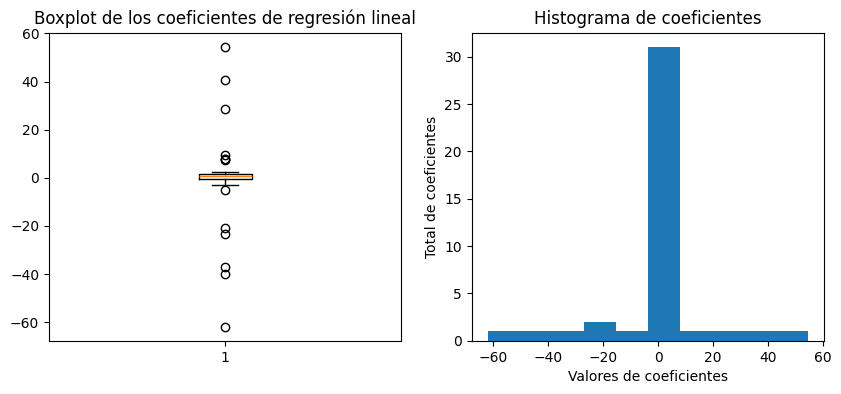

In [30]:
# # Gráfico de Coeficiente del modelo Ridge
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.boxplot(m_ridge.coef_)
plt.title('Boxplot de los coeficientes de regresión lineal')
plt.subplot(1, 2, 2)
plt.hist(m_ridge.coef_,10)
plt.xlabel('Valores de coeficientes')
plt.ylabel('Total de coeficientes')
plt.title('Histograma de coeficientes')
plt.show()

In [31]:
print(f'El porcentaje de variables canceladas es: {round(len(m_ridge.coef_[np.abs(m_ridge.coef_)==0])/len(m_ridge.coef_)*100,2)}%')
print(f'El modelo utiliza {len(m_ridge.coef_[np.abs(m_ridge.coef_)>0])} variables.')

El porcentaje de variables canceladas es: 2.44%
El modelo utiliza 40 variables.


# Metricas del Modelo

In [32]:
# Para Calcular las métricas del modelo
def calculate_metrics(y_train, y_test, y_train1, y_test1):
    
    # Calcular las métricas para entrenamiento
    mae_train = mean_absolute_error(y_train, y_train1)
    mape_train = mean_absolute_percentage_error(y_train, y_train1)*100
    r2_train = r2_score(y_train, y_train1)

    # Calcular las métricas para test
    mae_test = mean_absolute_error(y_test, y_test1)
    mape_test = mean_absolute_percentage_error(y_test, y_test1)*100
    r2_test = r2_score(y_test, y_test1)

    # Calcular las diferencias
    mae_diff = mae_test - mae_train
    mape_diff = mape_test - mape_train
    r2_diff = r2_test - r2_train

    # Para crear el DataFrame
    metrics_df = pd.DataFrame({
        'MAE': [mae_train, mae_test, mae_diff],
        'MAPE': [mape_train, mape_test, mape_diff],
        'R2': [r2_train, r2_test, r2_diff]
    }, index=['Train', 'Test', 'Difference'])

    return metrics_df

In [33]:
print('Modelo Lineal Simple')
print(calculate_metrics(y_train, y_test, y_train1, y_test1),'\n')
print('MOdelo Lineal Lasso')
print(calculate_metrics(y_train, y_test, y_train_lasso, y_pred_lasso),'\n')
print('Modelo Lineal Ridge')
print(calculate_metrics(y_train, y_test, y_train_ridge, y_test_ridge))

Modelo Lineal Simple
                    MAE       MAPE        R2
Train       4171.619461  18.447836  0.998583
Test        4409.566253  18.635652  0.994025
Difference   237.946792   0.187815 -0.004559 

MOdelo Lineal Lasso
                    MAE       MAPE        R2
Train       3999.105069  10.573111  0.998438
Test        3894.649861   9.386527  0.994573
Difference  -104.455207  -1.186584 -0.003865 

Modelo Lineal Ridge
                    MAE       MAPE        R2
Train       4228.273308  11.418197  0.998379
Test        4251.293883  10.017429  0.993618
Difference    23.020574  -1.400767 -0.004762


In [34]:
y_pred_lr = m_lineal.predict(X_test)
y_pred_lasso = lasso.predict(X_test)
y_pred_ridge = m_ridge.predict(X_test)

In [36]:
# Función para calcular métricas
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name}:")
    print(f"  MSE = {mse:.2f}")
    print(f"  R² = {r2:.2f}\n")

# Evaluar los tres modelos
evaluate_model(y_test, y_pred_lr, 'Regresión Lineal')
evaluate_model(y_test, y_pred_lasso, 'Lasso')
evaluate_model(y_test, y_pred_ridge, 'Ridge')

Regresión Lineal:
  MSE = 129085744.98
  R² = 0.99

Lasso:
  MSE = 117240069.27
  R² = 0.99

Ridge:
  MSE = 137879232.63
  R² = 0.99



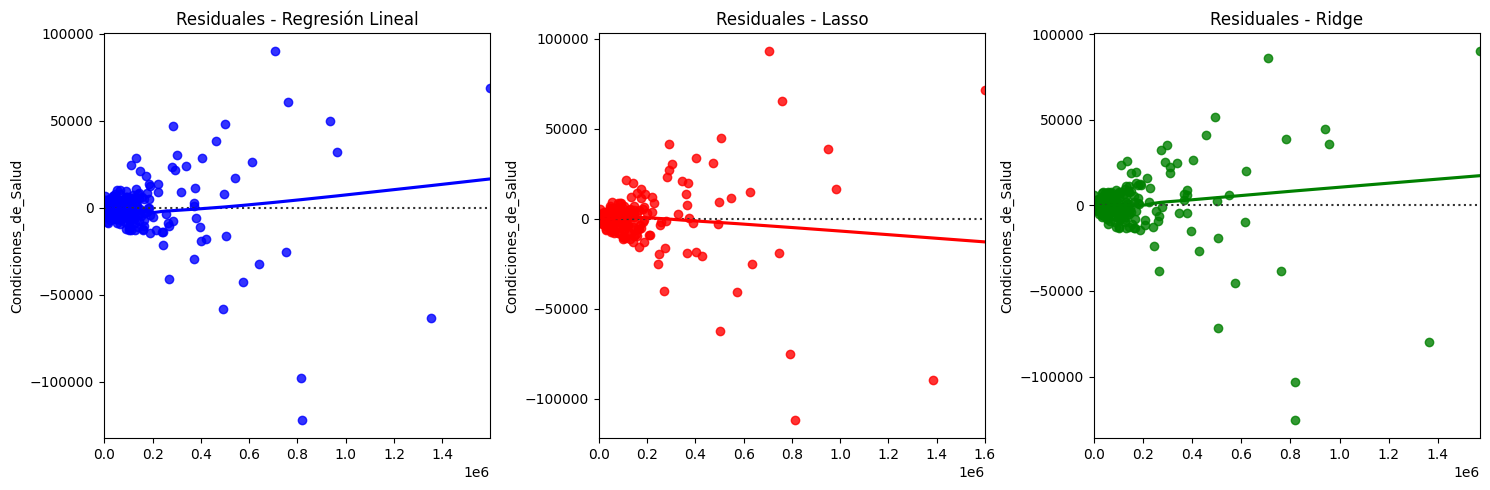

In [37]:
# Gráficos de residuales
plt.figure(figsize=(15, 5))

# Residuales para Regresión Lineal
plt.subplot(1, 3, 1)
sns.residplot(x=y_pred_lr, y=y_test - y_pred_lr, lowess=True, color='blue')
plt.title('Residuales - Regresión Lineal')

# Residuales para Lasso
plt.subplot(1, 3, 2)
sns.residplot(x=y_pred_lasso, y=y_test - y_pred_lasso, lowess=True, color='red')
plt.title('Residuales - Lasso')

# Residuales para Ridge
plt.subplot(1, 3, 3)
sns.residplot(x=y_pred_ridge, y=y_test - y_pred_ridge, lowess=True, color='green')
plt.title('Residuales - Ridge')

plt.tight_layout()
plt.show()

# Save los Archivos

In [38]:
# Convertir los arrays numpy escalados a DataFrames de pandas
X_train = pd.DataFrame(X_train, columns=X_train.columns)
X_test = pd.DataFrame(X_test, columns=X_test.columns)

# Añadir la columna 'y' a los DataFrames escalados
X_train["y"] = y_train.values
X_test["y"] = y_test.values

# Guardamos los archivos
X_train.to_csv("../data/processed/clean_train.csv", index = False)
X_test.to_csv("../data/processed/clean_test.csv", index = False)

In [39]:
from pickle import dump

dump(m_lineal, open("../models/LinearRegression.sav", "wb"))
dump(lasso, open("../models/LassoCV.sav", "wb"))
dump(m_ridge, open("../models/RidgeCV.sav", "wb"))

# Conclusiones

Conclusiones a partir de los resultados comparativos:

Rendimiento general del modelo Lasso:

Mejor equilibrio entre entrenamiento y test: El modelo Lasso no solo tiene las métricas más bajas de MAE (3894.65) y MAPE (9.39%) en test, sino que además estas son mejores que en entrenamiento (MAE: -104.45 de diferencia). Esto sugiere que la regularización Lasso está controlando eficazmente el sobreajuste y generalizando mejor que los demás modelos.

Menor MSE (117,240,069.27): Su error cuadrático medio es el más bajo, confirmando su superioridad en precisión.

R² consistente (0.9945 en test): Aunque ligeramente inferior al modelo lineal simple en entrenamiento, su estabilidad en test lo hace más confiable.

Problemas con el modelo Ridge:

Peor rendimiento que Lasso: Tiene el MAE más alto en test (4251.29) y el MSE más elevado (137,879,232.63), lo que indica que la regularización L2 no está aportando ventajas en este caso.

Leve sobreajuste: El MAE en test es mayor que en entrenamiento (+23.02), lo que no ocurre con Lasso.

Modelo Lineal Simple:

Sobreajuste moderado: La diferencia de MAE entre train y test es la más alta (+237.95), señalando que el modelo sin regularización pierde capacidad predictiva en datos nuevos.

MAPE más alto en test (18.64%): Casi duplica el MAPE de Lasso (9.39%), evidenciando problemas para manejar valores atípicos o relaciones no lineales.
